In [ ]:
!pip install tensorflow

In [2]:
!pip install ucimlrepo

In [ ]:
!pip install -U scikit-learn scipy matplotlib

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython.display import display, clear_output
import time
import matplotlib.pyplot as plt
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-05-16 09:50:24.832659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 09:50:27.538771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
pwd

'/home/mahmud/Labs/AILAB/Lab04'

In [4]:
import csv
import pandas as pd

# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('statlog+heart/heart.dat', sep=' ', names=headers)

In [5]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [6]:
#convert imput to numpy arrays
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


In [7]:
X.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [9]:
X.shape

(270, 13)

In [11]:
X.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
dtype: int64

In [12]:
X.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
dtype: object

## Building the Network

<h3>Concept of Layer</h3>
Imagine a neural network as a team of interconnected processing units, similar to how neurons work in the brain. These units, called layers, collaborate to create powerful mathematical functions. Each layer contains multiple artificial neurons that perform calculations on the data they receive. Let's take a closer look at a 3-layer neural network in the illustration below:

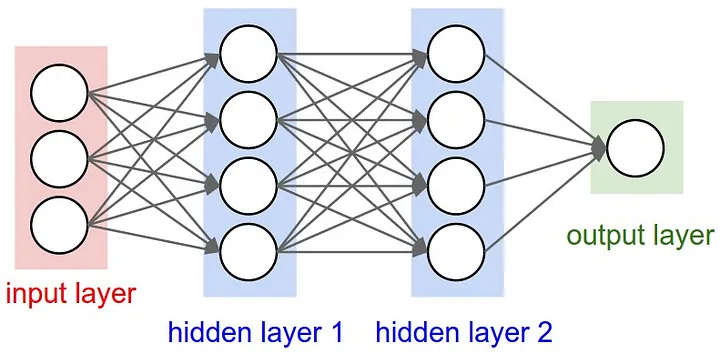

<h4>Input Layer</h4>
The first layer is called the input layer, and the number of nodes in the input layer will depend on the number of features present in the dataset. In our case, it will be 13 nodes because we have 13 features.

<h4>Output Layer</h4>
The final layer of the neural network is called the output layer, and the number depends on what we’re trying to predict. For regression and binary classification tasks, we can use a single node; while for multi-class problems, we’ll use multiple nodes, depending on the number of classes.

Here, I’ll use a single node for my final layer, because I am working on a binary classification task.

<h4>Hidded Layer</h4>
The layers between the input and the final layer is where the magic happens— these are called the hidden layers. The hidden layers can be as deep or wide as we want, and while a deeper network is better, the computational time also increases as we go deeper.

<h3>Layer Architecture of my Experiment</h3>

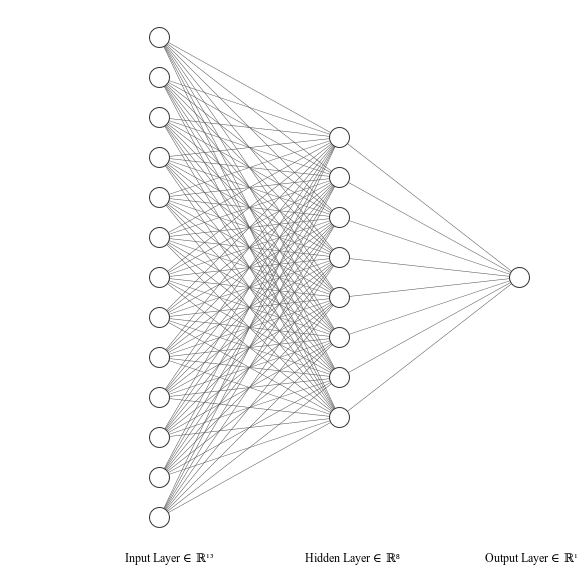


The neural net above will have one hidden layer and a final output layer. The input layer will have 13 nodes because we have 13 features, excluding the target. The hidden layer can accept any number of nodes, but I’ll start with 8, and the final layer, which makes the predictions, will have 1 node. Next, let’s talk about weights and biases that each layer must-have.

<h4>Weight and Biases</h4>
Weights and biases are the learnable parameters that help a neural network correctly learn a function. Think of weights as a measure of how sure you are that a feature contributes to a prediction and the bias as a base value that your predictions must start from.

In [14]:
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)

    # Later Part of the class will be explaing step by step 
    
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        '''
        The derivative of the ReLu function
        '''
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))
        
    def dsigmoid(self, x):
        '''
        The derivative of the sigmoid function
        '''
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

<h3>Activation Function</h3>

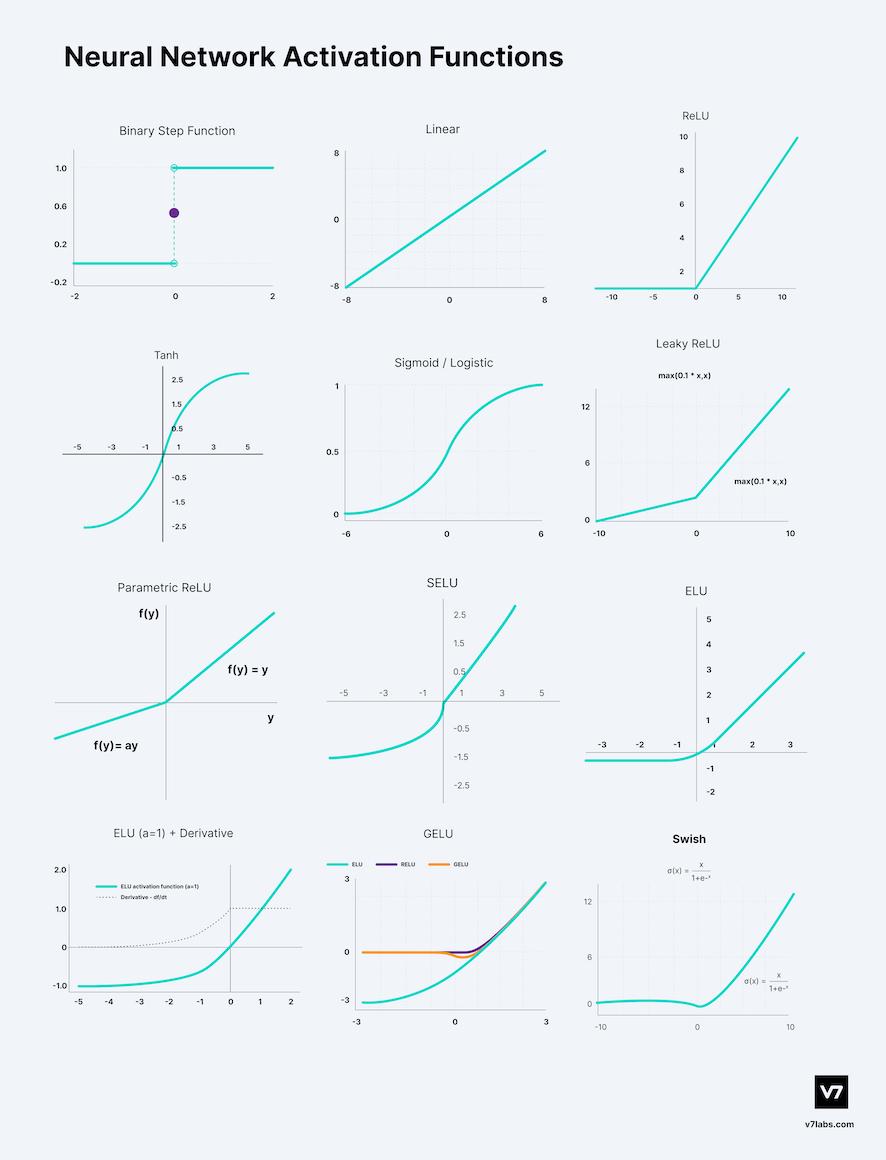

Activations are the nonlinear computations done in each node of a Neural Network. When I told that each node performs some mathematical computation? Well, that computation happens in two phases.


First, you do a weighted sum of the input and the weights, add the biases, and then pass the result through an activation function. I’ll explain why we do that below.

An activation function is what makes a neural network capable of learning complex non-linear functions. Non-linear functions are difficult for traditional machine learning algorithms like logistic and linear regression to learn. The activation function is what makes a neural network capable of understanding these functions.

There are many types of activation functions used in deep learning—some popular ones are Sigmoid, ReLU, tanh, Leaky ReLU, and so on. Each activation function has its pros and cons, but the ReLU function has been shown to perform very well.

In [15]:
def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

I will add this inside the NeuralNetwork class. This function performs an array-wise ReLU because I will be dealing mainly with arrays, not single values.

In summary, the hidden layer receives values from the input layer, calculates a weighted sum, adds the bias term, and then passes each result through an activation function—in our case initially a ReLU. The result from the ReLU is then passed to the output layer, where another weighted sum is performed using the second weights and biases. But then instead of passing the result through another activation function, it is passed through what I like to call the output function.

The output function will depend on what we’re trying to predict. We can use a sigmoid function when we have a two-class problem (binary classification), and we can use a function called softmax for multi-class problems.

In this tutorial, we will be using a sigmoid function for the output layer. This is because we’re predicting one of two classes.

### Sigmoid activation function and its derivative
The sigmoid function takes in real numbers in any range and squashes it to a real-valued output between 0 and 1.

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

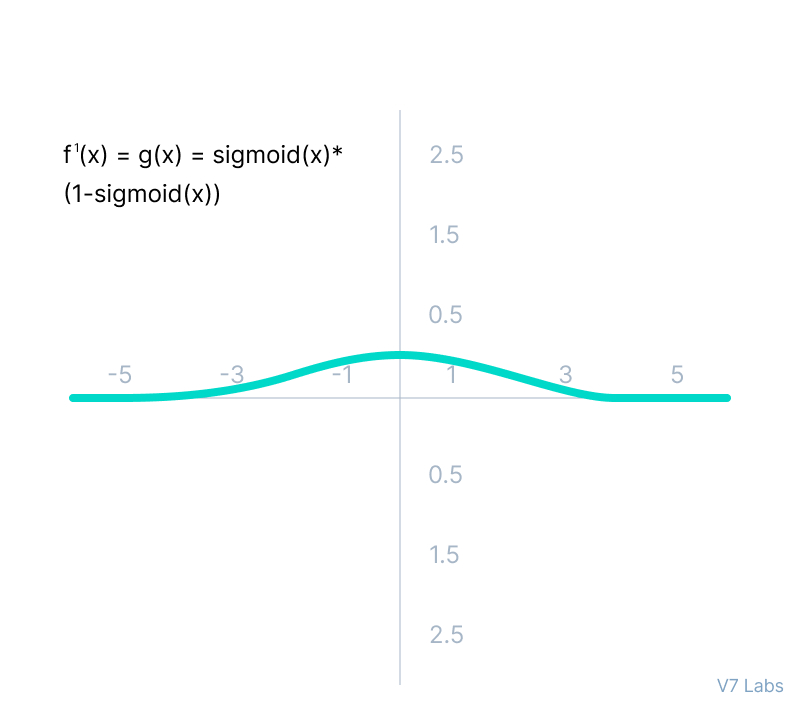

<h3>Loss Function</h3>
The loss function is a way of measuring how good a model’s prediction is so that it can adjust the weights and biases.

A loss function must be properly designed so that it can correctly penalize a model that is wrong and reward a model that is right. This means that you want the loss to tell you if a prediction made is far or close to the true prediction. The choice of the loss function is dependent on the task—and for classification problems, we can use cross-entropy loss.

<h4>Cross-Entropy Loss</h4>

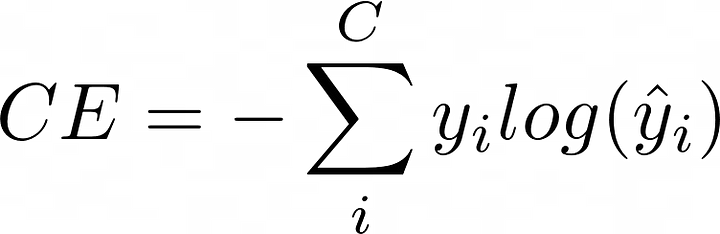

Where C is the number of classes, y is the true value and y_hat is the predicted value.


For a binary classification task (i.e. C=2), the cross-entropy loss function becomes:

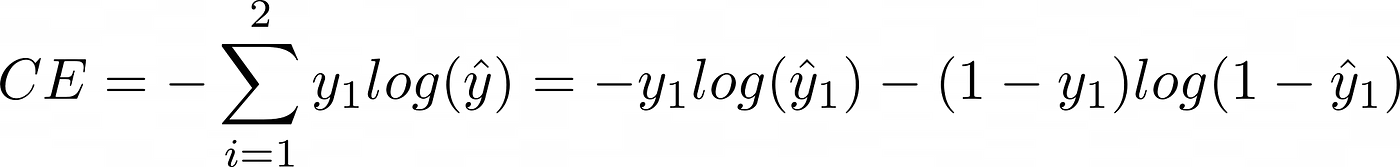

In [17]:
# Binary cross-entropy loss and its derivative
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    return -y_true / y_pred + (1 - y_true) / (1 - y_pred)

<h3>Forward Propagation</h3>
Forward propagation is the name given to the series of computations performed by the neural network before a prediction is made. In our two-layer network, we’ll perform the following computation for forward propagation:

<ol>
    <li>
        Compute the weighted sum between the input and the first layer's weights and then add the bias: <br>
        <b>Z1 = (W1 * X) + b </b>
    </li>
    <li>
        Pass the result through the ReLU activation function: <b>A1 = Relu(Z1)</b>
    </li>
    <li>
        Compute the weighted sum between the output (A1) of the previous step and the second layer's weights—also add the bias:<br> <b>Z2 = (W2 * A1) + b2</b>
    </li>
    <li>
        Compute the output function by passing the result through a sigmoid function: <b>A2 = sigmoid(Z2)</b>
    </li>
    <li>
        And finally, compute the loss between the predicted output and the true labels: <b>loss(A2, Y)</b>
    </li>
</ol>

In [18]:
def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

In the code cell above, first, I performed all the dot products and addition using the weights and biases I initialized earlier, calculate the loss by calling the entropy_loss function, save the calculated parameters and finally return the predicted values and the loss. These values will be used during backpropagation.

<h3>Backpropagation</h3>
Backpropagation is the name given to the process of training a neural network by updating its weights and bias.

<a href="https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60">All the Backpropagation Derivatives</a>

In [19]:
def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

In the backpropagation function, first, we create a function to calculate the derivatives of the ReLU, then we calculate and save the derivative of every parameter with respect to the loss function.

Notice we use a common naming scheme (`dl_wrt`). This helps keep our code clean and easy to read. Once we calculate these derivatives, we have to update our previous weights. That is the essence of computing derivatives—we basically want to know how to update our weights in order to minimize the loss.

<h3>Optimization and Training of the Neural Network</h3>
In the training phase, the neural network performs the following:
<ul>
    <li>Forward propagation</li>
    <li>Backpropagation</li>
    <li>Weight updates with calculated gradients</li>
    <li>Repeat</li>
</ul>

In [20]:
def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

The `fit` function takes 2 parameters: `X(input dataset)` and `y (labels)`. First, it saves the train and target to the class variable and then initializes the weights and biases by calling the init_weights function. Then, it loops through the specified number of iterations, performs forward and backpropagation, saves the loss.

### Prediction
To make predictions, we simply make a forward pass on the test data. That is, I used the saved weights and biases from the training phase. To make the process easier, we’ll add a function to our `NeuralNetwork` class called `predict`:

In [21]:
def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)   

The function passes the data through the forward propagation layer and computes the prediction using the saved weights and biases. The predictions are probability values ranging from 0 to 1. In order to interpret these probabilities, we can either round up the values or use a threshold function. To keep things simple, we just rounded up the probabilities.

## Training and Testing

In [22]:
nn = NeuralNet()

In [23]:
nn.fit(Xtrain, ytrain)

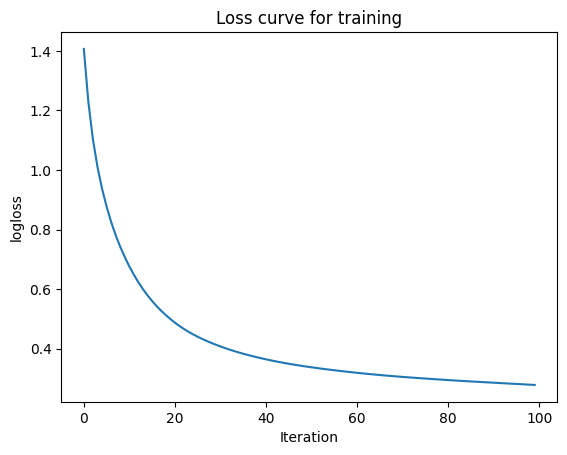

In [24]:
nn.plot_loss()

let’s try increasing the learning rate and the size of the hidden layer, and see how it affects the loss.

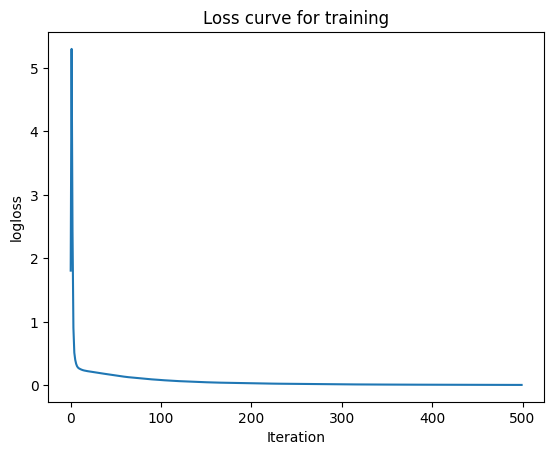

In [25]:
nn = NeuralNet(layers=[13,10,1], learning_rate=0.01, iterations=500) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

In [26]:
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

Train accuracy is 100
Test accuracy is 70


In [27]:
class ActivationFunction:
    def activation(self, Z):
        raise NotImplementedError("This method should be overridden by subclasses.")
    
    def derivative(self, Z):
        raise NotImplementedError("This method should be overridden by subclasses.")

class ReLU(ActivationFunction):
    def activation(self, Z):
        return np.maximum(0, Z)

    def derivative(self, Z):
        Z[Z <= 0] = 0
        Z[Z > 0] = 1
        return Z

class Sigmoid(ActivationFunction):
    def activation(self, Z):
        return 1 / (1 + np.exp(-Z))

    def derivative(self, Z):
        sig = self.activation(Z)
        return sig * (1 - sig)


In [28]:
class NeuralNet:
    def __init__(self, layers=[13, 8, 1], learning_rate=0.001, iterations=100, activation_hidden=ReLU(), activation_output=Sigmoid()):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        self.activation_hidden = activation_hidden
        self.activation_output = activation_output
                
    def init_weights(self):
        np.random.seed(1)
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1])
        self.params['b1'] = np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1], self.layers[2])
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)
    
    def entropy_loss(self, y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat)
        yhat_inv = self.eta(yhat_inv)
        loss = -1 / nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply(y_inv, np.log(yhat_inv))))
        return loss
    
    def forward_propagation(self):
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.activation_hidden.activation(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.activation_output.activation(Z2)
        loss = self.entropy_loss(self.y, yhat)
        
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1
        
        return yhat, loss
    
    def back_propagation(self, yhat):
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat
        
        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig
        
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)
        
        dl_wrt_z1 = dl_wrt_A1 * self.activation_hidden.derivative(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)
        
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights()
        
        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
    
    def predict(self, X):
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.activation_hidden.activation(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.activation_output.activation(Z2)
        return np.round(pred)
    
    def acc(self, y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc
    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

Train accuracy is 87
Test accuracy is 75


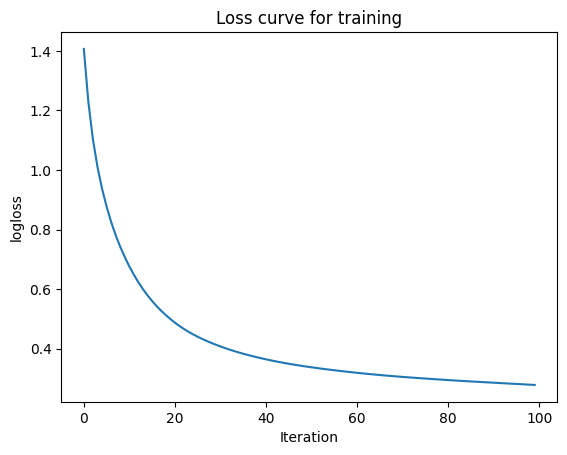

In [29]:
# Using ReLU for hidden layers and Sigmoid for output layer
nn = NeuralNet(activation_hidden=ReLU(), activation_output=Sigmoid())

# Fit the model
nn.fit(Xtrain, ytrain)

# Predict
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

# Plot the loss curve
nn.plot_loss()


### Tanh

In [30]:
class Tanh(ActivationFunction):
    def activation(self, Z):
        return np.tanh(Z)

    def derivative(self, Z):
        return 1 - np.tanh(Z)**2

Train accuracy is 100
Test accuracy is 75


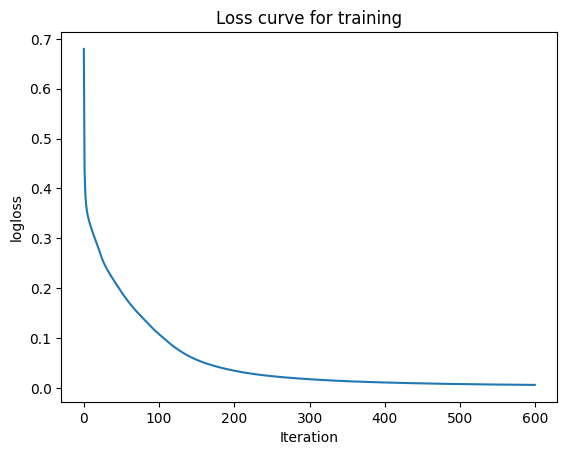

In [40]:
# Using Tanh for hidden layers and Sigmoid for output layer
nn = NeuralNet(layers=[13,10,1], learning_rate=0.01, iterations=600,activation_hidden=Tanh(), activation_output=Sigmoid())

# Fit the model
nn.fit(Xtrain, ytrain)

# Predict
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))


# Plot the loss curve
nn.plot_loss()


### SWISH

In [41]:
class Swish(ActivationFunction):
    def activation(self, Z):
        return Z * self.sigmoid(Z)
    
    def derivative(self, Z):
        sig = self.sigmoid(Z)
        return sig + Z * sig * (1 - sig)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))


Train accuracy is 100
Test accuracy is 68


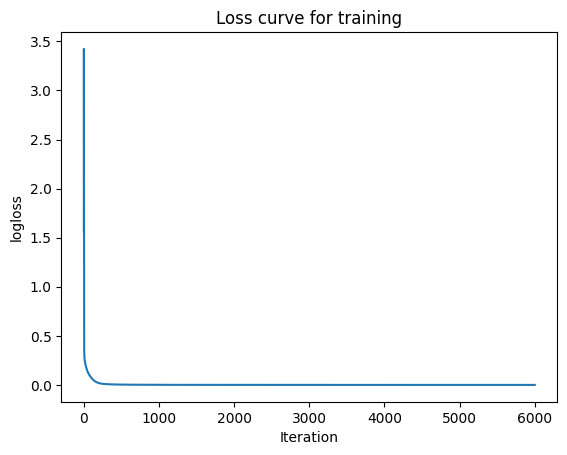

In [45]:
# Using Swish for hidden layers and Sigmoid for output layer
nn = NeuralNet(layers=[13,10,1], learning_rate=0.01, iterations=6000, activation_hidden=Swish(), activation_output=Sigmoid())

# Fit the model
nn.fit(Xtrain, ytrain)

# Predict
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))


# Plot the loss curve
nn.plot_loss()